# **1**.   **Data Exploration**





In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [30]:
df = pd.read_csv('../Data/clean_data.csv')

In [31]:
# Check the structure and types of features
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5708 entries, 0 to 5707
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                5708 non-null   int64  
 1   Price             5708 non-null   float64
 2   Area              5708 non-null   float64
 3   Bedrooms          5708 non-null   float64
 4   WCs               5708 non-null   float64
 5   Floors            5708 non-null   float64
 6   Legal_status      5708 non-null   float64
 7   Frontage          5708 non-null   float64
 8   Price_per_sqm     5708 non-null   float64
 9   District_encoded  5708 non-null   int64  
 10  Month             5708 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 490.7 KB
None


In [32]:

# Check basic statistics of numerical features
print(df.describe())

display(df)

             No        Price         Area     Bedrooms          WCs  \
count  5708.000  5708.000000  5708.000000  5708.000000  5708.000000   
mean   2854.500     6.632874    68.305242     3.602488     3.387701   
std    1647.902     3.439563    39.703702     2.039776     1.936481   
min       1.000     0.124000     5.000000     1.000000     1.000000   
25%    1427.750     4.200000    45.000000     2.000000     2.000000   
50%    2854.500     5.695000    60.000000     3.000000     3.000000   
75%    4281.250     8.300000    80.000000     4.000000     4.000000   
max    5708.000    18.000000   525.000000    44.000000    37.000000   

            Floors  Legal_status     Frontage  Price_per_sqm  \
count  5708.000000   5708.000000  5708.000000    5708.000000   
mean      3.047302      0.135599    -0.078486       0.107270   
std       1.001421      0.990851     0.726581       0.052508   
min       1.000000     -1.000000    -1.000000       0.030000   
25%       2.000000     -1.000000    -1.0

,No,Price,Area,Bedrooms,WCs,Floors,Legal_status,Frontage,Price_per_sqm,District_encoded,Month
0,1,13.5,44.00,3.0,3.0,5.0,-1.0,1.0,0.31,0,11
1,2,8.7,45.00,3.0,3.0,4.0,1.0,0.0,0.19,0,11
2,3,9.3,40.00,4.0,4.0,4.0,1.0,0.0,0.23,0,11
3,4,15.0,151.69,5.0,4.0,3.0,-1.0,1.0,0.10,0,10
4,5,16.0,151.69,5.0,4.0,3.0,-1.0,1.0,0.11,0,10
...,...,...,...,...,...,...,...,...,...,...,...
5703,5704,9.5,61.40,4.0,4.0,3.0,-1.0,1.0,0.15,23,1
5704,5705,13.5,104.70,3.0,4.0,4.0,1.0,0.0,0.13,23,1
5705,5706,6.8,68.00,4.0,4.0,3.0,1.0,0.0,0.10,23,1
5706,5707,6.5,62.50,3.0,4.0,2.0,-1.0,-1.0,0.10,23,1


In [33]:
df.drop('No',axis=1,inplace=True)

# **2. Feature Selection/Engineering**

In [34]:
# Tính giá trung bình trên mỗi mét vuông cho mỗi quận
average_pricesqm_per_district = df.groupby('District_encoded')['Price_per_sqm'].mean().reset_index()

# Đổi tên cột để dễ nhận biết
average_pricesqm_per_district.columns = ['District_encoded', 'Average_pricesqm']

In [35]:
# Kết hợp dữ liệu giá trung bình trên mỗi mét vuông vào dataframe chính
df = df.merge(average_pricesqm_per_district, on='District_encoded', how='left')

# Xem dataframe sau khi thêm đặc trưng mới
print(df.head())


   Price    Area  Bedrooms  WCs  Floors  Legal_status  Frontage  \
0   13.5   44.00       3.0  3.0     5.0          -1.0       1.0   
1    8.7   45.00       3.0  3.0     4.0           1.0       0.0   
2    9.3   40.00       4.0  4.0     4.0           1.0       0.0   
3   15.0  151.69       5.0  4.0     3.0          -1.0       1.0   
4   16.0  151.69       5.0  4.0     3.0          -1.0       1.0   

   Price_per_sqm  District_encoded  Month  Average_pricesqm  
0           0.31                 0     11          0.174722  
1           0.19                 0     11          0.174722  
2           0.23                 0     11          0.174722  
3           0.10                 0     10          0.174722  
4           0.11                 0     10          0.174722  


In [36]:
numerical_features = ['Area', 'Bedrooms', 'WCs', 'Floors', 'Price_per_sqm', 'Average_pricesqm']

# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa các đặc trưng số
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Mã hóa các đặc trưng phân loại
# Legal_status: 1 (có sổ), -1 (không có thông tin)
# Frontage: 1 (mặt tiền), 0 (hẻm), -1 (không có thông tin)
df['Legal_status_1'] = (df['Legal_status'] == 1).astype(int)
df['Legal_status_missing'] = (df['Legal_status'] == -1).astype(int)

df['Frontage_1'] = (df['Frontage'] == 1).astype(int)
df['Frontage_0'] = (df['Frontage'] == 0).astype(int)
df['Frontage_missing'] = (df['Frontage'] == -1).astype(int)

# Loại bỏ các cột ban đầu của Legal_status và Frontage
df = df.drop(['Legal_status', 'Frontage'], axis=1)

The reason for encoding Legal_status and Frontage into binary indicators is to avoid implying a linear relationship with house prices.

In [37]:
df

,Price,Area,Bedrooms,WCs,Floors,Price_per_sqm,District_encoded,Month,Average_pricesqm,Legal_status_1,Legal_status_missing,Frontage_1,Frontage_0,Frontage_missing
0,13.5,0.075000,0.046512,0.055556,0.571429,0.231405,0,11,0.929908,0,1,1,0,0
1,8.7,0.076923,0.046512,0.055556,0.428571,0.132231,0,11,0.929908,1,0,0,1,0
2,9.3,0.067308,0.069767,0.083333,0.428571,0.165289,0,11,0.929908,1,0,0,1,0
3,15.0,0.282096,0.093023,0.083333,0.285714,0.057851,0,10,0.929908,0,1,1,0,0
4,16.0,0.282096,0.093023,0.083333,0.285714,0.066116,0,10,0.929908,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,9.5,0.108462,0.069767,0.083333,0.285714,0.099174,23,1,0.347623,0,1,1,0,0
5704,13.5,0.191731,0.046512,0.083333,0.428571,0.082645,23,1,0.347623,1,0,0,1,0
5705,6.8,0.121154,0.069767,0.083333,0.285714,0.057851,23,1,0.347623,1,0,0,1,0
5706,6.5,0.110577,0.046512,0.083333,0.142857,0.057851,23,1,0.347623,0,1,0,0,1


# **4.   Model Training**

In [38]:

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature      # chỉ số của đặc trưng để chia
        self.threshold = threshold  # ngưỡng để chia đặc trưng
        self.left = left            # cây con bên trái (nhỏ hơn hoặc bằng ngưỡng)
        self.right = right          # cây con bên phải (lớn hơn ngưỡng)
        self.value = value          # giá trị của nút lá (trung bình giá trị y)




In [39]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, random_state=None):
        """
        Initialize Decision Tree Regressor model.

        Parameters:
        - max_depth (int): Maximum depth of the tree. If None, the tree is fully grown.
        - random_state (int): Seed for random state to ensure reproducibility.

        Attributes:
        - max_depth (int): Maximum depth of the tree.
        - random_state (int): Random state seed.
        - tree_ (Node): Root node of the decision tree after fitting.
        """
        self.max_depth = max_depth
        self.random_state = random_state
        self.tree_ = None
    
    def fit(self, X, y):
        """
        Fit the Decision Tree model based on the training data.

        Parameters:
        - X (numpy array, shape = [n_samples, n_features]): Input data.
        - y (numpy array, shape = [n_samples]): Labels of the training data.
        """
        np.random.seed(self.random_state)
        self.tree_ = self._grow_tree(X, y)
    
    def predict(self, X):
        """
        Predict values for new input data.

        Parameters:
        - X (numpy array, shape = [n_samples, n_features]): Input data to predict.

        Returns:
        - predictions (numpy array, shape = [n_samples]): Predicted values corresponding to each input sample.
        """
        return np.array([self._predict(inputs, self.tree_) for inputs in X])
    
    def _grow_tree(self, X, y, depth=0):
        """
        Build the decision tree from the training data.

        Parameters:
        - X (numpy array, shape = [n_samples, n_features]): Input data.
        - y (numpy array, shape = [n_samples]): Labels of the data.
        - depth (int): Current depth of the tree.

        Returns:
        - node (Node): Root node of the decision tree.
        """
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1:
            return Node(value=np.mean(y))

        feature_indices = np.random.choice(n_features, n_features, replace=False)
        best_feature, best_threshold = self._best_criteria(X, y, feature_indices)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices

        if not np.any(left_indices) or not np.any(right_indices):
            return Node(value=np.mean(y))

        left_tree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(best_feature, best_threshold, left_tree, right_tree)

    def _best_criteria(self, X, y, feature_indices):
        """
        Find the best criteria to split the data.

        Parameters:
        - X (numpy array, shape = [n_samples, n_features]): Input data.
        - y (numpy array, shape = [n_samples]): Labels of the data.
        - feature_indices (numpy array, shape = [n_features]): Indices of features to consider.

        Returns:
        - split_idx (int): Index of the best feature to split.
        - split_threshold (float): Best threshold value for splitting the data.
        """
        best_gain = -1
        split_idx, split_threshold = None, None
        for feature_idx in feature_indices:
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = self._information_gain(y, X[:, feature_idx] <= threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold
        return split_idx, split_threshold

    def _information_gain(self, y, splits):
        """
        Calculate the information gain when splitting the data.

        Parameters:
        - y (numpy array, shape = [n_samples]): Labels of the data.
        - splits (boolean numpy array, shape = [n_samples]): Indices of samples after splitting.

        Returns:
        - gain (float): Information gain from splitting.
        """
        parent_entropy = self._entropy(y)
        left_entropy = self._entropy(y[splits])
        right_entropy = self._entropy(y[~splits])
        weighted_child_entropy = (len(y[splits]) / len(y)) * left_entropy + (len(y[~splits]) / len(y)) * right_entropy
        return parent_entropy - weighted_child_entropy

    def _entropy(self, y):
        """
        Calculate the entropy of the data.

        Parameters:
        - y (numpy array, shape = [n_samples]): Labels of the data.

        Returns:
        - entropy (float): Entropy of the data.
        """
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-10))

    def _predict(self, inputs, node):
        """
        Predict the value of a sample based on the decision tree.

        Parameters:
        - inputs (numpy array, shape = [n_features]): Sample data to predict.
        - node (Node): Decision tree node.

        Returns:
        - prediction (float): Predicted value of the sample.
        """
        while node.left:
            if inputs[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value


In [40]:

# Chia tập thành các biến đặc trưng (X) và biến mục tiêu (Y)
X = df.drop('Price', axis=1)  # Đặc trưng
Y = df['Price']  # Biến mục tiêu

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
def simple_grid_search_decision_tree(X_train, y_train, X_test, y_test, max_depths):
    best_depth = None
    best_mse = float('inf')

    for depth in max_depths:
        model = DecisionTreeRegressor(max_depth=depth)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)

        if mse < best_mse:
            best_mse = mse
            best_depth = depth

    return best_depth, best_mse


In [42]:
# Sử dụng DecisionTree bạn đã định nghĩa để huấn luyện mô hình
tree = DecisionTreeRegressor(max_depth=50)
tree.fit(X_train.values, Y_train.values)

# Dự đoán trên tập kiểm tra
Y_pred_tree = tree.predict(X_test.values)

# Đánh giá hiệu suất của mô hình

print("Ridge Regression - MSE:", mean_squared_error(Y_test.values, Y_pred_tree))
print("Ridge Regression - MAE:", mean_absolute_error(Y_test.values, Y_pred_tree))
print("Ridge Regression - R^2:", r2_score(Y_test.values, Y_pred_tree))


Ridge Regression - MSE: 0.8067219789842383
Ridge Regression - MAE: 0.4501313485113836
Ridge Regression - R^2: 0.9296774218779065


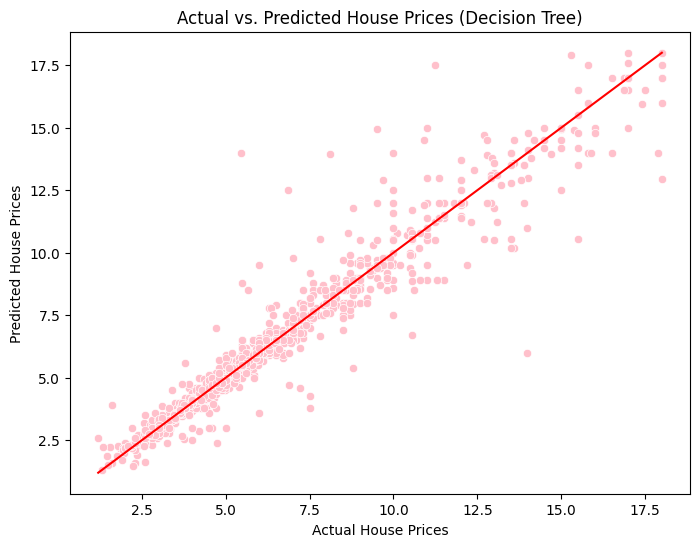

In [43]:
# Assume y_test và rf_y_pred là các giá trị thực và dự đoán tương ứng của Random Forest
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=Y_pred_tree, color='pink')

# Plot a line for perfect predictions
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='-')

plt.title('Actual vs. Predicted House Prices (Decision Tree)')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.grid(False)
plt.show()
